# La régression linéaire ☕️ 

**<span style='color:blue'> Objectifs de la séquence</span>** 
* Concevoir&nbsp;:
    * la régression linéaire d'un point de vue prédictif,
    * la régression linéaire au travers d'un problème d'optimisation.
* Être capable&nbsp;:
    * d'implémenter un algorithme de descente de gradient,
    * de transformer les variables d'entrée pour rendre le modèle non linéaire,
    * d'utiliser la librairie $\texttt{sklearn}$.
* De s'initier à la notion de régularisation et de sélection de variables.



 ----

## I. Introduction

La régression linéaire est un modèle cherchant à établir un lien linéaire entre des données d'observation et des données à prédire. Plus concrètement, les données observées sont décrites par un vecteur $\mathbf{x} \in \mathbb{R}^d$ et la variable à prédire, par une quantité scalaire (un réel) $y \in \mathbb{R}$. On notera $\mathbf{x}, y\sim \mathbb{P}$ la loi jointe du couple (par un abus de langage important, $\mathbf{x}$ et $y$ expriment à la fois une variable aléatoire et sa réalisation) avec $\mu$ la marginale de $\mathbf{x}$ et le lien s'exprime sous le format suivant&nbsp;:


$$y = \beta_0 +  x_1 \beta_1 + x_2 \beta_2 + x_3 \beta_3 + ... + x_d \beta_d +\epsilon = \beta_0 + \sum_i^d x_i \beta_i+\epsilon,\ \epsilon\sim\mathcal{N}(0, \sigma)$$


que l'on peut aussi écrire en notation vectorielle&nbsp;:


$$y = \beta_0  + \langle \boldsymbol{\beta}, \mathbf{x} \rangle +\epsilon,\ \epsilon\sim\mathcal{N}(0, \sigma)$$


où $\boldsymbol{\beta} \in \mathbb{R}^d$ et $\beta_0\in\mathbb{R}$ correspondent respectivement au vecteur et au scalaire contenant les paramètres du "vrai" modèle qui défini le lien entre les données et que l'on va vouloir apprendre pour prédire la bonne valeur de $y$ en fonction du vecteur $\mathbf{x}$. Le modèle linéaire ne peut prédire la variable $y$ qu'à un bruit $\epsilon$ près. Une fois ces paramètres appris par notre algorithme d'apprentissage, on pourra utiliser la fonction de prédiction $f_{\boldsymbol{\beta}}(\mathbf{x}): \mathbb{R}^d \rightarrow \mathbb{R}$ apprise pour prédire la valeur $y_{new}$ associée à un nouveau vecteur $\mathbf{x_{new}}$ que l'on n'a pas encore observé&nbsp;:


$$\hat{y}_{new} = f_{\boldsymbol{\beta}}(\boldsymbol{x_{new}}) = \beta_0  + \langle \boldsymbol{\beta}, \boldsymbol{x_{new}} \rangle$$

Pour simplifier les calculs et les notations, on préfère que la fonction de prédiction puisse se calculer à partir d'une notation complètement vectorielle. C'est ce que l'on fait en pratique, en ajoutant une composante supplémentaire $x_0$ au vecteur $\mathbf{x}$ égale à $1$&nbsp;:

$$\begin{align*}
    \mathbf{x} &= \begin{bmatrix}
          1 \\
           x_{1} \\
           \vdots \\
           x_{d}
         \end{bmatrix},
\end{align*}$$

de sorte à ce que la fonction de prédiction linéaire puisse s'exprimer simplement sous la forme du produit scalaire: 

$$\begin{aligned}
    f_{\boldsymbol{\beta}}(\mathbf{x}) &= \langle \boldsymbol{\beta}, \mathbf{x} \rangle &=
          \begin{bmatrix}
           \beta_{0} \\           
           \vdots \\
           \beta_{d}
          \end{bmatrix}^T
          \begin{bmatrix}
           1 \\
           \vdots \\
           x_{d}
         \end{bmatrix} &= \sum_{i=0}^d x_i \beta_i=\langle \boldsymbol{x}, \boldsymbol{\beta}\rangle_{\mathbb{R}^{d+1}}
\end{aligned}$$

où cette fois $\boldsymbol{\beta} \in \mathbb{R}^{d+1}$, $\boldsymbol{x} \in \mathbb{R}^{d+1}$ et $\langle \cdot, \cdot\rangle_{\mathbb{R}^{d+1}}$ est le produit scalaire dans $\mathbb{R}^{d+1}$. Le but d'un algorithme d'apprentissage sera de trouver un estimateur $\boldsymbol{\hat{\beta}}$ de $\boldsymbol{\beta}$ à partir d'un ensemble fini de $n$ exemples d'apprentissage $(\boldsymbol{x}, \langle \boldsymbol{\beta}, \boldsymbol{x} \rangle + \epsilon) \in \mathbb{R}^2$ préalablement collectés. On notera $\mathcal{S}=\{(\boldsymbol{x_i}, y_i)\}_{i\leq n}$ le jeu de données.



 ----Les modèles prédictifs cherchent à réaliser une prédiction relative à une tâche quelconque après avoir pu observer une donnée $x$. Le modèle étant bien entendu "appris" à partir d'un jeu de données d'apprentissage.

Les modèles descriptifs cherchent à quantifier les liens entre les variables explicatives et la variable à expliquer. 

Que ce soit pour une analyse prédictive ou une analyse descriptive, nous pouvons utiliser un modèle linéaire. Cependant, dans le cadre d'une analyse prédictive, le critère clé sera vraiment la qualité de la prédiction sur des ***données nouvelles***.


 ----
Nous commencerons par implémenter le cas simple d'une régréssion linéaire à une seule variable d'entrée et une seule variable de sortie qui pourra donc s'écrire sous la forme&nbsp;:


$$\hat{y} = f_{\boldsymbol{\beta}}(\mathbf{x}) = \beta_0  + \beta_1 x$$


C'est à dire une fonction affine dont on pourra afficher la représentation graphique (une droite) sur une figure en 2 dimensions. Par la suite vous aurez donc à implémenter le calcul de la fonction de coût du modèle sur l'ensemble d'apprentissage, le calcul du gradient de cette fonction de coût ainsi que l'algorithme de descente de gradient qui, à partir du gradient, permet d'obtenir le vecteur $\hat{\beta}$.

La seconde partie de ce notebook étendra ces notions à des concepts plus compliqués.

## II. Construction d'un jeu de données

Commençons tout d'abord par simuler notre jeu de données avec le modèle génératif suivant&nbsp; :


$$\boldsymbol{x} \sim \mathcal{N}(\mu, \sigma) \in \mathbb{R}$$


ou $\sigma$ correspond à la variance de la variable explicative. Nous choissons une règle arbitraire pour générer aléatoirement les paramètres du "vrai" modèle&nbsp;:


$$\boldsymbol{\beta} \sim \mathbb{U}(-1, 1)^2 \in \mathbb{R}^2$$


où $\mathbb{U}^2$ est la loi uniforme dans $\mathbb{R}^2$. Enfin, le bruit est construit de la manière suivante&nbsp;:


$$\epsilon \sim \mathcal{N}(0, 1).$$

Chaque exemple d'apprentissage correspond donc à un couple de réels $(x_j, y_j = \beta_0  + \beta_1 x_j + \epsilon) \in \mathbb{R}^2$. Le code ci dessous construit et affiche le jeux de données ainsi que la représentation graphique de $f(x)=\beta_1x+\beta_0$.

In [20]:
import numpy as np

# on simule le vecteur de parametre
beta = np.random.uniform(-1, 1, size=(2,1))

# on construit un jeu de donnees de 10 points selon la methode 
# decrite ci-dessus.
def sample_data(n, sigma=5, add_noise=True):
    X = np.random.normal(0, sigma, size=n)
    noise = np.random.normal(0, 1, size=n)*(add_noise*1)
    y = beta[1] * X + noise + beta[0]
    return X, y

X, y = sample_data(10, add_noise=True)  # jouer avec le bruit

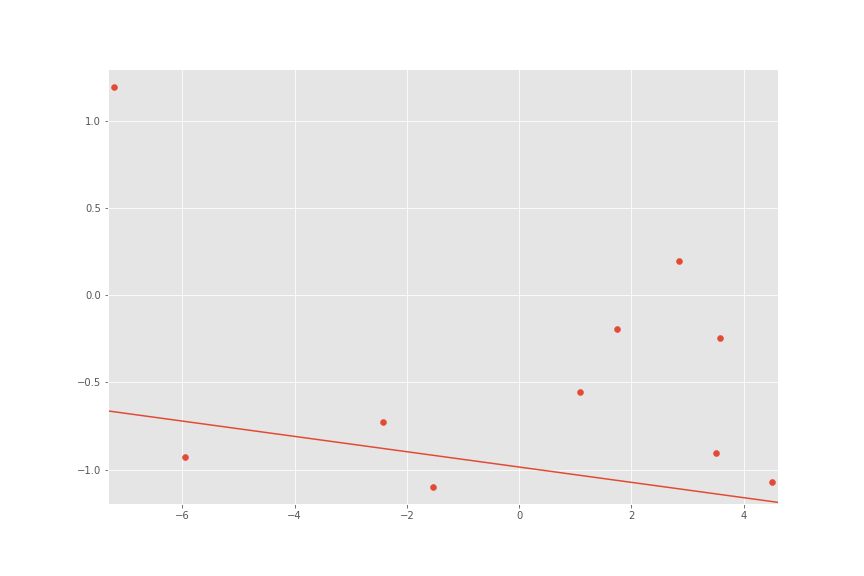

In [21]:
import matplotlib
import matplotlib.pyplot as plt

# configuration generale de matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('ggplot')

# plot de la fonction
def plot(X, y, beta=None, func=None):
    eps = 0.1
    plt.scatter(X, y)
    ymin_ = y.min() - eps
    ymax_ = y.max() + eps
    min_ = X.min() - eps
    max_ = X.max() + eps
    if beta is not None or func is not None:
        x_ = np.linspace(min_, max_, 500)
        if func is None:
            y_ = beta[1] * x_ + beta[0]
            plt.plot(x_, y_)
        else:
            func = [(func, '')] if type(func) is not list else func
            disp_legend = False
            for t in func:
                y_ = t[0](x_.reshape((x_.shape[0], 1)))
                plt.plot(x_, y_, label=t[1])
                disp_legend = disp_legend or t[1] != ''
            if disp_legend:
                plt.legend()

    plt.xlim((min_, max_))
    plt.ylim((ymin_, ymax_))
    plt.show()
    
# on plot le dataset precedent
plot(X, y, beta)

**<span style='color:blue'> Exercice</span>** 
**Que se passe-t-il si le bruit $\epsilon$ est nul ? Quelle est alors la méthode la plus rapide pour trouver les paramètres du vrai modèle ?**

Les points se situent sur la droite, ils ne sont plus écartés par rapport à elle. Pour retrouver les paramètres du vrai modèle quand il n'y a pas de bruit, il suffit de prendre l'origine de la droite ainsi que son coefficient directeur.




 ----


**<span style='color:green'> Interpolation</span>** 
Lorsque le bruit disparait, la droite passe exactement par tous les points (à moins que l'hypothèse $y=\langle\beta, x\rangle$ soit fausse). On parle alors d'interpolation.


 ----

## III. Du modèle statistique à l'optimisation

### A. La fonction objectif

Nous souhaitons en pratique trouver un paramêtre $\boldsymbol{\hat{\beta}}$ qui minimise le risque du modèle, c'est-à-dire la quantité d'erreur en espérance de n'importe quel modèle $\boldsymbol{\beta}$. On notera $\boldsymbol{\beta}^\star$ le "vrai" modèle, soit celui qui minimise le risque en espérance. Pour la régression linéaire, on peut définir ce risque comme&nbsp;:


$$R(\boldsymbol{\beta}) = \mathbb{E}_{X\times Y}\Big[ (f_{\boldsymbol{\beta}}(\mathbf{X}) - Y)^2 \Big].$$

On ne sait pas calculer cette fonction car on ne connaît pas la distribution jointe et où qu’on ne sait pas calculer l’intégrale. Cependant, on peut en avoir un estimateur via un jeu de données $\mathcal{S}$, où $\mathcal{S} = \Big\{ \big(\boldsymbol{x_j}, y_j \big) \Big\}_{j\leq n}$ est un jeu de données composé de $n$ points indépendants et identiquement distribués selon le modèle génératif décrit précédement. 


A défaut d'avoir accès au risque (i.e. à l'erreur en espérance), on peut utiliser une autre quantité qui consiste en la somme des carrés des erreurs de prédictions pour chaque exemple d'apprentissage, c'est **le risque emprique**&nbsp;:


$$J(\boldsymbol{\beta}) = R_{emp}(\boldsymbol{\beta}) = \frac{1}{n}\sum_j^n (f_{\boldsymbol{\beta}}(x_j) - y_j)^2$$

où $f_{\boldsymbol{\beta}}(x_j) = \beta_0  + \beta_1 x_j$. On montre assez facilement que pour un $\boldsymbol{\beta}$ quelconque&nbsp;:


$$R(\boldsymbol{\beta})=\mathbb{E}_{\mathcal{S \sim \mathbb{P}_S}}\big[J(\boldsymbol{\beta})\big],$$

Notons que minimiser ce risque empirique revient à chercher le maximum de vraisemblance du modèle statistique. Effectivement, avec l'hypothèse gaussienne, la vraissemblance de n'importe quel modèle de paramètres $\boldsymbol{\beta}$ pour un jeu de données $\mathcal{S}$ peut s'écrire&nbsp;:


$$\mathcal{L}_{\mathcal{S}}(\boldsymbol{\beta}) \propto \prod_{\boldsymbol{x}\times y\in\mathcal{S}} \exp\Bigg(-\frac{\big(f_{\boldsymbol{\beta}}(\mathbf{x}) - y\big)^2}{2}\Bigg)$$

Le paramètre maximisant la vraissamblance est aussi celui minimisant la log-vraissamblance négative&nbsp;:

$$- \text{log} \Big( \mathcal{L}_{\mathcal{S}}(\boldsymbol{\beta})\Big) = \sum_{\boldsymbol{x}\times y\in\mathcal{S}}\frac{\big(f_{\boldsymbol{\beta}}(\mathbf{x}) - y\big)^2}{2}\propto\sum_{\boldsymbol{x}\times y\in\mathcal{S}}\big(f_{\boldsymbol{\beta}}(\mathbf{x}) - y\big)^2$$

N'ayant accès au véritable risque, on cherche $\boldsymbol{\hat{\beta}}$ tel que&nbsp;:


$$\boldsymbol{\hat{\beta}} = \text{argmin}_{\boldsymbol{\beta}} \Big[ - \log \Big( \mathcal{L}_{\mathcal{S}}(\boldsymbol{\beta})\Big) \Big]$$


Minimiser le risque emprique se traduit donc naturellement par un problème d'optimisation de la fonction de coût $J(\boldsymbol{\beta}) : \mathbb{R}^2 \rightarrow \mathbb{R}$ ($\mathbb{R}^2$ dans notre exemple courant, $\mathbb{R}^{d+1}$ dans le cas général) par rapport à $\boldsymbol{\beta}$.

En pratique et pour des raisons de simplicité, on ne minimise pas $\sum_{\boldsymbol{x}\times y\in\mathcal{S}}\big(f_{\boldsymbol{\beta}}(\mathbf{x}) - y\big)^2$ mais&nbsp;:

$$J(\boldsymbol{\beta}) = \frac{1}{2n}\sum_{\boldsymbol{x}\times y\in\mathcal{S}} (f_{\boldsymbol{\beta}}(x) - y)^2$$

Le résultat est bien évidemment le même. La division par $2$ est là pour simplifier l'expresion du gradient que l'on calculera et la division par $n$ permet de rendre la norme du gradient indépendente de la taille de notre jeu de données. C'est une propriété importante pour l'algorithme de descente de gradient dont la taille des déplacements affecte sa stabilité.

**Note - Notation vectorielle de la régression linéaire :** On peut aussi exprimer ce calcul avec une équation en notation vectorielle. Pour cela, on exprime dans un premier temps le résultat de la fonction de prédiction en notation vectorielle (il s'agit de la prédiction pour tout notre jeu de données)&nbsp;:

$$f_{\boldsymbol{\beta}}(\mathbf{X}) = \mathbf{X}\boldsymbol{\beta}\in\mathbb{R}^n$$

où $\boldsymbol{\beta} \in \mathbb{R}^{d+1}$ est une matrice de dimensions $(d+1)\times 1$ (en $\texttt{numpy}$, la dimension $1$ est importante) et $\mathbf{X}$ est une matrice de dimensions $n\times (d+1)$ dont les $n$ vecteurs lignes correspondent aux vecteurs d'apprentissage d'entrée. Dans notre cas (celui de la régression linéaire à $1$ variable) la matrice prend la forme suivante&nbsp;:

$$\begin{aligned}
\mathbf{X} = 
\begin{pmatrix} 
1 & x_{1} \\
\vdots & \vdots\\
1 & x_{j} \\
\vdots & \vdots\\
1 & x_{n} 
\end{pmatrix},\ \boldsymbol{\beta}=
\begin{bmatrix}
\beta_{0} \\           
\beta_{1}
\end{bmatrix}
\end{aligned}$$

La fonction de coût peut ainsi s'exprimer&nbsp;:


$$J(\boldsymbol{\beta}) = \frac{1}{2n} (\mathbf{X}\boldsymbol{\beta} - \mathbf{y})^T(\mathbf{X}\boldsymbol{\beta} - \mathbf{y})$$

que l'on peut réécrire&nbsp;:

$$J(\boldsymbol{\beta}) = \frac{1}{2n} (\mathbf{\hat{y}} - \mathbf{y})^T(\mathbf{\hat{y}} - \mathbf{y}) =  \frac{1}{2n} ||\mathbf{\hat{y}} - \mathbf{y}||_2^2$$

où $\mathbf{y} \in  \mathbb{R}^n$ est le vecteur dont chacune des composantes $y_j$ sont les valeurs à prédire à partir de leur $x_j$ correspondant, et $\hat{y} \in  \mathbb{R}^n$ correspond aux valeurs prédites par le modèle. On note ici que la fonction objectif à optimiser peut se calculer aisément en utilisant la norme euclidienne au carré du vecteur d'erreur.

### B. Optimisation par Descente de gradient

**<span style='color:blue'> Le gradient est orthogonal aux lignes de niveau</span>** 
Soit $c:\mathbb{R}^+\mapsto\mathbb{R}^d$ un arc paramétré qui suit une ligne de niveau de $f$ (un arc paramétré prend en argument le "temps" et retourne une coordonnée dans l'espace). Si $c$ suit une ligne de niveau, nous avons donc&nbsp;:

$$f(c(t))=f(c(0))=\text{const}.$$

Cela implique que nous ayons aussi&nbsp;:

$$(f(c(t)))^\prime=\langle \nabla f(c(t)), c^\prime(t)\rangle=0,$$

où $\nabla f(c(t))$ est le gradient en $c(t)$ et $c^\prime(t)$ donne la direction de l'arc paramétré (i.e. de la ligne de niveau) en $c(t)$. Les deux sont bien ainsi orthogonaux.


 ----
La descente de gradient est une méthode d'optimisation numérique permettant de trouver les valeurs des paramètres qui minimisent une fonction. Dans notre cas, nous voulons minimiser l'erreur de prédiction moyenne de notre modèle, fonction définie précédemment. Cette méthode d'optimisation consiste à calculer le gradient de notre fonction objectif par rapport aux paramètres courant du modèle et de les déplacer par un "petit" pas dans la direction opposée au gradient (i.e. le gradient donne la plus forte croissance et son opposé la plus forte décroissance).



**Définition générale du gradient d'une fonction à plusieurs variables&nbsp;:** Il s'agit simplement du vecteur contenant les dérivées partielles de la fonction, c-à-d les dérivées de la fonction par rapport à chaque variable indépendamment des autres&nbsp;:

$$\begin{aligned}
\nabla_{\boldsymbol{\beta}} J(\boldsymbol{\beta}) = \frac{\partial J(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 
\begin{bmatrix}
\frac{\partial J(\beta)}{\partial \beta_0}\\
\frac{\partial J(\beta)}{\partial \beta_1}\\
 \vdots \\
\frac{\partial J(\beta)}{\partial \beta_d}
\end{bmatrix}
\end{aligned}$$

**<span style='color:blue'> Le gradient est la plus forte pente</span>** 
Soit $c:\mathbb{R}^+\mapsto\mathbb{R}^d$ un arc paramétré et soit $f:\mathbb{R}^d\mapsto\mathbb{R}$. Nous étudions l'évolution de $f$ le long de $c$&nbsp;:

$$f(c(t)).$$

L'accroissement de $f$ le long de $c(t)$ est donné par la dérivée&nbsp;:

$$(f(c(t))^\prime=\langle \nabla f(c(t)), c^\prime(t)\rangle.$$

Nous avons par Cauchy-Schwartz&nbsp;:

$$\lVert\langle \nabla f(c), c^\prime\rangle\rVert \leq \lVert\nabla f(c)\rVert\lVert c^\prime\rVert,$$

où le gradient et l'arc sont évalués en $t$. L'égalité est atteinte lorsque les vecteurs sont colinéaires. La plus forte pente est donc la direction du gradient.



 ----
En descente de gradient, la mise à jour de chaque paramètre $\beta_j$ du modèle à l'itération $t$ se fait donc avec la règle suivante&nbsp;:

$$\beta_j^{(t+1)} = \beta_j^{(t)} - \rho  \frac{\partial J(\beta^{(t)})}{\partial \beta_j}$$

ou bien, en notation vectorielle&nbsp;:


$$\boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} - \rho  \nabla_{\boldsymbol{\beta}} J(\boldsymbol{\beta})^{(t)}$$



où $\rho$ est le learning rate (pas d'apprentissage). Un pas d'apprentissage $\rho$ trop petit nous fera nous déplacer trop lentement et trop grand rendra l'optimisation instable.

### C. À vous de jouer

**<span style='color:blue'> Question 1</span>** **Complétez la méthode $\texttt{val}$ de l'objet $\texttt{LeastSquare}$ ci-dessous.**


 ----

**<span style='color:blue'> Question 2</span>** **Calculez les dérivées partielles $\partial J(\beta)/\partial \beta_0$ et $\partial J(\beta)/\partial \beta_1$ de la fonction de coût de notre modèle de régréssion linéaire. Complétez la méthode $\texttt{grad}$ de l'objet $\texttt{LeastSquare}$ ci dessous.**



 ----
**<span style='color:green'> Indices</span>** 
Rappellez vous que la dérivée d'une composition de fonctions s'écrit $(g \circ f)^\prime (x) = f^\prime(x) g^\prime(f(x))$ et que la fonction de coût de notre modèle s'écrit&nbsp;:


$$J(\boldsymbol{\beta}) = \frac{1}{2n}\sum_j^n g(f_{\boldsymbol{\beta}}(x_j) - y_j)$$


avec $g(z) = z ^ 2$ et $f_{\boldsymbol{\beta}}(x_j) = \beta_0  + \beta_1 x_j$.



 ----



**<span style='color:blue'> Question 3 (dur)</span>** **Calculez le gradient de la fonction $J(\boldsymbol{\beta})$ en utilisant les dérivées matricielles. Complétez la méthode $\texttt{grad}$ de l'objet $\texttt{LeastSquare}$ avec le gradient en notation vectorielle.**



 ----


In [22]:
# Le code ci-dessous permettra d'afficher notre fonction de cout (le risque empirique)
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('ggplot')

def plot_loss_contour(l, param_trace=None, figsize=None, three_dim=False, rotate=12):
    
    x, y = np.mgrid[slice(-4, 4 + 0.1, 0.1),
                    slice(-4, 4 + 0.1, 0.1)]
    z = np.zeros(x.shape)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i, j] = l.val([x[i, j], y[i, j]])
    if figsize is not None:
        f = plt.figure(figsize=figsize)
    else:
        f = plt.figure(figsize=(12.0, 8.0))
    if three_dim:
        ax = Axes3D(f)
        f.add_axes(ax)
    else:
        ax = f.gca()
    
    if three_dim:
        m = ax.plot_surface(x, y, np.sqrt(z), cmap=cm.viridis)
    else:
        m = ax.contourf(x, y, np.sqrt(z), levels = 10)
    #
    if param_trace is not None:
        if three_dim:
            eps = 0.5
            #ax.scatter(param_trace[:, 0], param_trace[:, 1], param_trace[:, 2] + eps, 
            #           color='blue', alpha=1)
            ax.plot(param_trace[:, 0], param_trace[:, 1], param_trace[:, 2] + eps, 
                    color='red')
            ax.view_init(50, rotate)
                
        else:
            param_trace = np.array(param_trace) if type(param_trace) is list else param_trace
            plt.plot(param_trace[:, 0], param_trace[:, 1])
            plt.scatter(param_trace[:, 0], param_trace[:, 1])
            f.colorbar(m)
    plt.show()

La valeur de la loss pour le vrai parametre est 0.7128554008400654
La valeur du gradient pour le vrai parametre est
 [[-5.5288611 ]
 [ 2.04219814]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


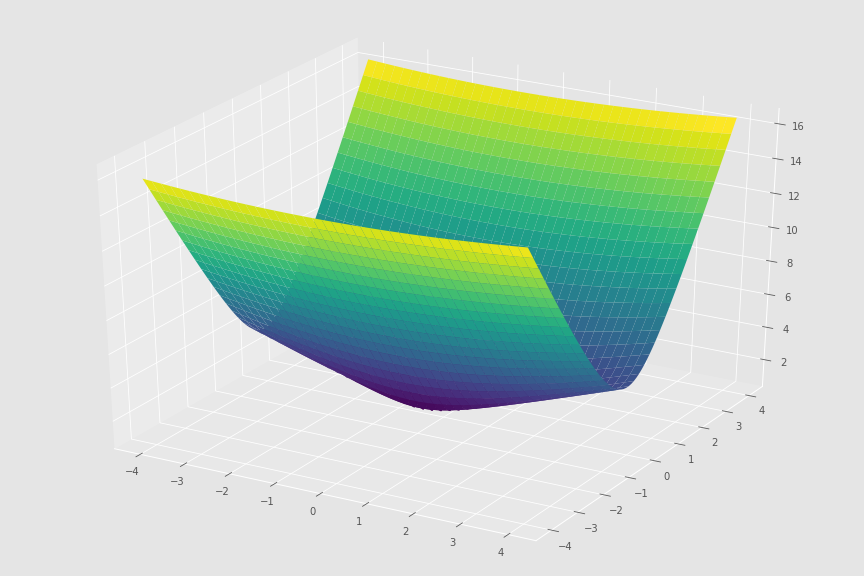

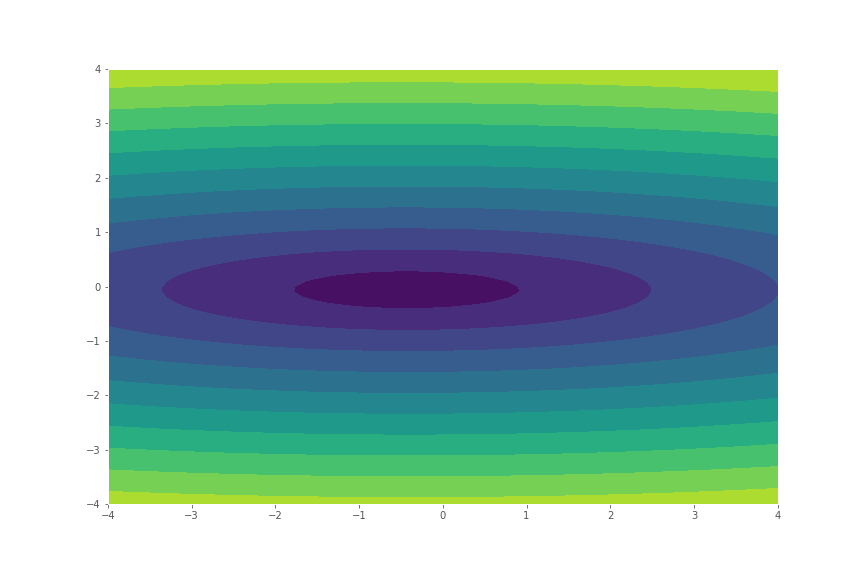

In [23]:
class LeastSquare(object):
    def __init__(self, X, y):
        self.X = np.insert(LeastSquare._format_ndarray(X), 0, 1, axis=1)
        self.y = LeastSquare._format_ndarray(y)
        self.idx = np.array([i for i in range(self.X.shape[0])])
        self._pos = 0
        
    def _format_ndarray(arr):
        arr = np.array(arr) if type(arr) is not np.ndarray else arr
        return arr.reshape((arr.shape[0], 1)) if len(arr.shape) == 1 else arr
    
    ## Exercice 1
    def val(self, beta):
        beta = LeastSquare._format_ndarray(beta)
        n = len(self.X)
        x = self.X
        y = self.y
        val = (1/n)*(np.linalg.norm(np.dot(x, beta)-y))**2
        return val
    
    def _shuffle(self):
        np.random.shuffle(self.idx)
    
    def grad(self, beta, batch_size=-1):
        batch_size = self.X.shape[0] if batch_size == -1 else batch_size
        idx = self.idx[self._pos:self._pos+batch_size]

        self._pos = (self._pos+batch_size) % self.X.shape[0]
        if self._pos == 0:
            self._shuffle()
            
        X, y = self.X[idx], self.y[idx]

        beta = LeastSquare._format_ndarray(beta)

        grad = np.dot(X.T,np.dot(X, beta)-y)

        return grad
    

l = LeastSquare(X, y)
print('La valeur de la loss pour le vrai parametre est', l.val(beta))
print('La valeur du gradient pour le vrai parametre est\n', l.grad(beta))
plot_loss_contour(l, three_dim=True)
plot_loss_contour(l, three_dim=False)


Attention, pour des raisons de temps de calcul, l'estimation du gradient n'est pas tout le temps faite sur tout le jeu de données mais sur une partie de celui-ci. Un estimateur calculé de cette manière là aura en espérance la même valeur qu'un gradient calculé sur toutes les données. On appelle généralement Descente de Gradient Stochastique ou SGD une approche qui ne fait qu'estimer le gradient à partir d'un batch de données.

**<span style='color:blue'> Question</span>** 
**Saurez-vous retrouver dans le code ci-dessus ce qui permet de jouer sur la taille du batch lors du calcul du gradient ?**



 ----

###  D. L'algorithme de descente de gradient

**<span style='color:blue'> Exercice</span>** 
**Complétez le code de descente de gradient.**



 ----

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


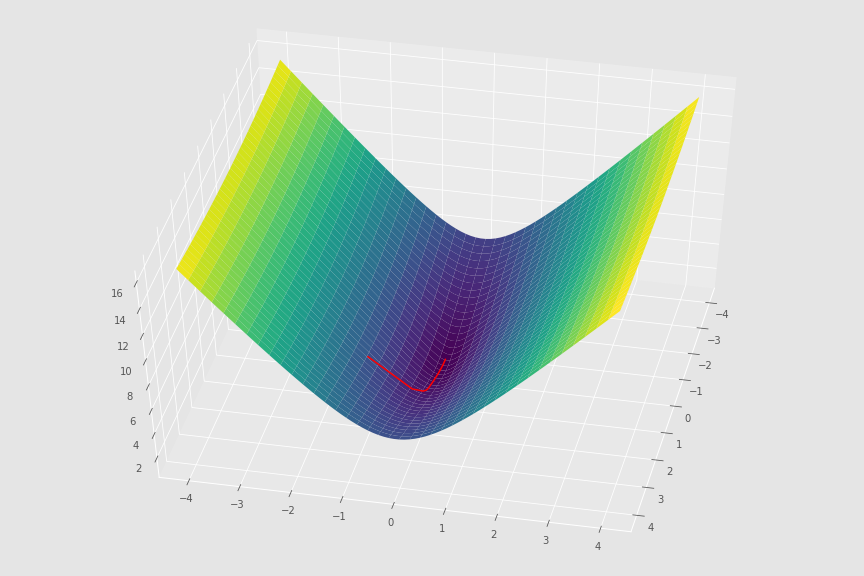

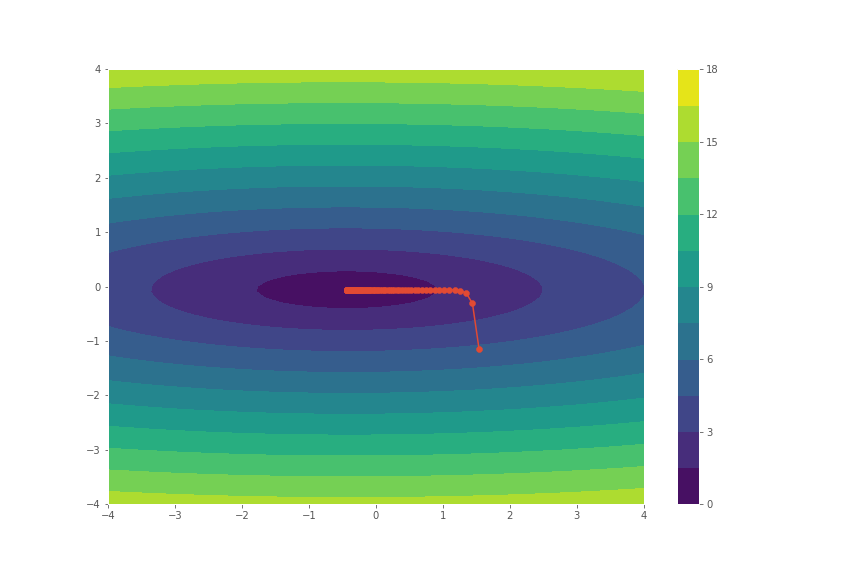

In [24]:
class GradientDescent(object):
    init = np.random.uniform(-4, 4, size=2).reshape((2, 1))
    def __init__(self, X, y, loss=LeastSquare):
        self.loss = loss(X, y)
        
    def optimize(self, learning_rate = 0.005, nb_iterations=100, beta=init, batch_size=-1):
        param_trace = [beta.T[0]]
        loss_trace = [self.loss.val(beta)]
        for i in range(nb_iterations):
            ####### Complete this part ######## or die ####################
            beta = beta - learning_rate * self.loss.grad(beta, batch_size=batch_size)
            ###############################################################
            param_trace.append(beta.T[0])
            loss_trace.append(self.loss.val(beta))
            
        return param_trace, loss_trace
        
gd = GradientDescent(X, y)

param_trace, loss_trace = gd.optimize(nb_iterations=500)

param_trace = np.array(param_trace)
loss_trace = np.array(loss_trace)
loss_trace = loss_trace.reshape((loss_trace.shape[0], 1))
xyz = np.concatenate([param_trace, np.sqrt(loss_trace)], axis=1)

plot_loss_contour(l, param_trace=xyz, three_dim=True)
plot_loss_contour(l, param_trace=param_trace, three_dim=False)


In [25]:
# Pensez a installer ipywidgets
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
%matplotlib inline

output = widgets.Output()

@output.capture()
def interactive_gradient_descent(learning_rate, batch_size):
    clear_output()
    param_trace , loss_trace = gd.optimize(learning_rate = learning_rate, batch_size = batch_size)
    plot_loss_contour(gd.loss, param_trace, figsize=(14.0, 6.0))


In [26]:
widgets.interact(interactive_gradient_descent,
                 learning_rate=widgets.FloatSlider(value=1e-5, min=1e-5, max=0.05, step=0.0001, 
                                                   continuous_update=False, readout_format='.5f'),
                 batch_size=widgets.IntSlider(value=X.shape[0], min=1, max=X.shape[0], step=1, 
                                              continuous_update=False)
)
display(output)


interactive(children=(FloatSlider(value=1e-05, continuous_update=False, description='learning_rate', max=0.05,…

Output()

**<span style='color:blue'> Convergence de la descente de gradient</span>** 
Notons $\beta^\star$ une solution du problème d'optimisation ci-dessus. Si le pas d'apprentissage est assez petit, alors il est possible de démontrer que l'algorithme de descente de gradient converge nécessairement vers $J(\beta^\star)$ à une vitesse proportionnelle à $1/k$ où $k$ est le nombre d'itérations. La séquence ***optimisation*** de ce cours démontrera rigoureusement cela.



 ----

**<span style='color:blue'> Stochastic Gradient Descent</span>** 
La propriété d'orthogonalité par rapport aux lignes de niveau de la fonction de coût est elle conservée dans ce cas ? Pourquoi ? Ne suit-on pourtant toujours pas le gradient ? Que pouvez vous dire sur la nature et la "vitesse" de convergence vers le minimum de la fonction ? Réfléchissez d'un point de vue calculatoire sur ce qui se passe sur des tailles d'échantillons très grandes ? 



 ----

### E. Les équations normales de la régression linéaire : la solution par pseudo-inverse

Comme calculé plus haut, l'expression du gradient est donnée par $(X^TX\boldsymbol{\beta}-X^T\boldsymbol{y})/n$.  La fonction $J$ étant coercive et convexe, elle admet au moins un minimum local/global. Les points critiques sont donnés en annulant le gradient&nbsp;:


$$X^TX\boldsymbol{\beta}-X^T\boldsymbol{y} = 0 \Leftrightarrow X^TX\boldsymbol{\beta}=X^t\boldsymbol{y}.$$


Il s'agit des équations dites "normales". Tout vecteur $\boldsymbol{\beta}$ solution de ces équations est donc nécessairement un minimiseur de $J(\boldsymbol{\beta})$.

**Dans le cas standard (i.e. sur-déterminé)** où chaque variable explicative est linéairement indépendante des autres et où le nombre d'échantillons de notre jeu de données est supérieur ou égal à la dimension du problème considéré, la matrice $X^TX$ est inversible (i.e. $\text{det}(X^TX)\neq 0$). Dit autrement, il existe une unique solution aux équations normales donnée par&nbsp;:


$$\hat{\boldsymbol{\beta}}=(X^TX)^{-1}X^T\boldsymbol{y}.$$


On appelle $X^\dagger = (X^TX)^{-1}X^T$  pseudo-inverse de $X$ (ou inverse généralisée) et la solution analytique à notre problème est donnée par $\hat{\boldsymbol{\beta}}=X^\dagger \boldsymbol{y}$.

**<span style='color:green'> L'effet du bruit</span>** 
Soit $\boldsymbol{y}=X\boldsymbol{\beta}+\eta$ où on utilise $\eta$ plutôt que $\epsilon$ pour différentier la réalisation effective du bruit de la variable aléatoire. Notre estimateur est donc&nbsp;:

$$\begin{aligned}\hat{\beta}&=X^\dagger y = X^\dagger(X\boldsymbol{\beta} + \eta)\\ &= (X^\dagger X)\boldsymbol{\beta} + X^\dagger\eta.\end{aligned}$$

On observe, par propriété de la pseudo-inverse, que la première contribution est la projection orthogonale du vrai modèle sur l'espace des vecteurs ligne de $X$. Il est donc une combinaison linéaire des vecteurs que l'on voit pendant l'apprentissage ! La deuxième contribution est l'effet du bruit sur la solution optimale. Nous discuterons plus loin de ces contributions et d'effets étranges qui peuvent se produire notament quand la matrice $X$ est mal conditionnée (le ratio entre la plus grande valeur propre de $X^TX$ et sa plus petite valeur propre est très grand).



 ----

**Dans le cas non standard (i.e. sous-déterminé)** où certaines variables peuvent être des combinaisons linéaires d'autres variables (inutile en pratique) ou si le nombre d'échantillons est inférieur à la dimension, $X^TX$ n'est plus inversible. Dans ce cas de figure, il existe une infinité de solutions aux équations normales (i.e. une infinité de minimiseurs). Dans ce cas, la solution de norme minimale est donnée par&nbsp;:

$$\hat{\beta}=X^\dagger y = X^T(XX^T)^{-1}y.$$

**Concernant le cas général (i.e. sous et sur-déterminé),.** E. H. Moore (1920), A. Bjerhammar (1951) et R. Penrose (1955) proposent indépendamment une expression générale de $X^\dagger$ appelée pseudo-inverse de Moore-Penrose et calculable à partir d'une décomposition en valeur singulière, notée $X^\dagger$. Celle-ci coïncide bien sûr avec l'expression standard lorsqu'elle existe. On obtient donc une expression analytique générale, solution des équations normales&nbsp;:


$$\hat{\boldsymbol{\beta}}=X^\dagger\boldsymbol{y},$$


où $X^\dagger$ est le pseudo-inverse de Moore-Penrose. Celle-ci est obtenue par une décomposition en valeurs singulières $X=U\Sigma V^T$ de la manière suivante&nbsp;: $X^\dagger = V\Sigma^{-1}U^T$ où $\Sigma^{-1}$ est la matrice $\Sigma$ où nous avons inversés les valeurs singulières non nulles. La séquence de cours "Les moindres carrés via une décomposition QR (et plus)" détaille cela.


**<span style='color:green'> Un système d'équations</span>** 
En réalité, minimiser les moindres carrés revient à résoudre un système d'équation&nbsp;:

$$Ax=y\text{ ou }Ax\approx y.$$

Si le problème possède autant d'équation que d'inconnues, alors le problème est bien posé et admet une solution. Si le nombre d'équations (linéairement indépendantes) est supérieur au nombre d'inconnues, alors le problème est sur-déterminé et on ne peut résoudre que $Ax\approx y$. Enfin, si le nombre d'équations est inférieur au nombre d'inconnues, alors il existe une infinité de solutions et on choisira celle de norme minimale.



 ----
***Quelques précisions d'algèbre***&nbsp; : finalement, quel est le lien entre une pseudo-inverse et l'inverse classique. Soit une application linéaire $A:\mathbb{R}^n\mapsto\mathbb{R}^n$ représentée par une matrice $A\in\mathbb{R}^{n\times n}$. On appelle inverse de $A$ l'unique matrice, notée $A^{-1}$, telle que  $A^{-1}A=\text{Id}$. Dans le cas inversible, l'inverse de $A^{-1}$ est donc de manière évidente $A$. Cela revient à transformer un vecteur $x\in\mathbb{R}^n$ par $A$ puis à annuler sa transformation par $A^{-1}$. L'inverse n'existe cependant pas toujours. Ainsi, par exemple, si $\text{ker}(A)\neq \{\boldsymbol{0}\}$ (i.e. le noyau ne se résume pas à l'élément nul, nous avons $\forall x\in\mathbb{R}^n,\ u\in\text{ker}(A)$ que $A(x+u)=Ax$. Finalement l'inverse de $Ax$ est-il $x$ ou $x+u$ ?

Reprenons le cas de la pseudo-inverse. Quelques propriétés qui peuvent sembler évidentes émergent&nbsp;:


$$\begin{align*}
AA^\dagger A&=A\text{ (appliquer }A\text{, son inverse }A^\dagger\text{ puis }A\text{ à nouveau revient à appliquer }A\text{)}\\
A^\dagger AA^\dagger&=A^\dagger\text{ (c'est la même chose du point de vu de l'inverse)}\\
(AA^\dagger)^T&=AA^\dagger\text{ (la transposition n'a pas d'effet)}\\
(A^\dagger A)^T&=A^\dagger A\text{ (même chose que précédemment du point de vu de l'inverse)}
\end{align*}$$

La pseudo inverse est l'unique matrice $A^\dagger$ satisfaisant les propriétés précédentes. Dans le cas où $A$ est inversible, on a alors $A^\dagger=A^{-1}$. Intuitivement, l'idée est de ne considérer "que" les éléments qui ne sont pas dans le noyaux. Ainsi $\text{Im}(A)=\text{Ker}(A^\dagger)^\perp$ et inversement.

**<span style='color:blue'> Exercice</span>** 
**Vérifier que les deux inverses proposées dans les cas sur-déterminé et sous-déterminé vérifient bien les égalités précédentes.**



 ----

La question à laquelle nous pouvons maintenant essayer de répondre est en quoi une pseudo-inverse permet d'obtenir une solution acceptable au problème des moindres carrés. Idéalement, nous aurions&nbsp;:

$$Ax = y \text{ généralement noté }X\beta=y.$$

En pratique, il n'existe pas nécessairement de vecteur $x$ tel que cette égalité soit satisfaite. Dit autrement, $y$ n'est pas dans l'image de $A$, notée $\text{Im}(A)$. Nous cherchons ainsi à trouver $x$ tel que $\lVert Ax-y\rVert_2$ est minimisé. Notons $K(A)$ le noyau de $A$. Considérons maintenant la proposition suivante&nbsp;:

**<span style='color:blue'> Proposition</span>** 
$$\text{proj}_{\text{Im}(A)}=AA^\dagger \text{ (projection orthogonale sur l'image de }A\text{)}$$

$$\text{proj}_{\text{K}(A^T)}=I-AA^\dagger$$

$$\text{proj}_{\text{Im}(A^T)}=A^\dagger A$$

$$\text{proj}_{\text{K}(A)}=I-A^\dagger A$$



 ----
**<span style='color:orange'> Preuve</span>** 
Démontrons la première égalité.

Nous avons $(AA^\dagger)^T=AA^\dagger$ et notre application est donc symétrique. De plus, 

$$(AA^\dagger)(AA^\dagger)=(AA^\dagger A)A^\dagger = AA^\dagger$$

et notre application est donc [idempotente](https://fr.wikipedia.org/wiki/Idempotence). L'idempotence implique que $\text{proj}_{\text{Im}(X)}$ est un projecteur (non nécessairement orthogonal).

Soit $y\in\text{Im}(A)$. Il existe donc $x$ tel que $y=Ax$. Nous avons donc&nbsp;:

$$\text{proj}_{\text{Im}(A)}(y)=AA^\dagger y=AA^\dagger A x=Ax=y.$$

Ainsi, si $y\in\text{Im}(A)$, le projecteur le projette sur lui-même. Considérons maintenant $z\in \text{Im}(A)^\perp$. Dit autrement, $(Ax)^Tz=0=x^TA^Tz,\ \forall x$ impliquant $A^Tz=0$.
Nous avons donc&nbsp;:

$$\text{proj}_{\text{Im}(A)}(z)=AA^\dagger z = (AA^\dagger)^T z = (A^\dagger)^TA^Tz = 0.$$

Tous les éléments orthogonaux à l'image de $A$ sont projetés sur $0$. Nous avons donc bien un projecteur orthogonal.


 ----
Cela nous permet de rédiger la proposition suivante&nbsp;:

**<span style='color:blue'> Proposition</span>** 
La solution de norme minimale de $\lVert Ax-y\rVert_2$ est donnée par&nbsp;:
    
$$x=A^\dagger y$$



 ----
**<span style='color:orange'> Preuve</span>** 
Comme nous l'avons vu, en pratique l'équation&nbsp;:

$$Ax= y$$

n'admet pas de solution et nous devons considérer celle qui minimise l'erreur au carré (i.e. la norme euclidienne). Le vecteur de résidus qui minimisera l'erreur est celui qui sera orthogonal à l'image de $A$ (la plus courte distance, Pythagore tout ça). Dit autrement, on cherche à résoudre le système d'équations suivant&nbsp;:

$$Ax=\text{proj}_{\text{Im}(A)}(y)=AA^\dagger y.$$

Si $y$ est déjà dans l'image et qu'une solution existe, alors c'est cela ne change rien puisque $\text{proj}_{\text{Im}(A)}(y)=y$, sinon on cherche la solution la plus proche. Nous avons donc&nbsp;:

$$Ax=AA^\dagger y\Leftrightarrow A(x-A^\dagger y)=0$$

On constate ainsi que $(x-A^\dagger y)\in K(A)$. N'importe quel élément $x$ tel que $x-A^\dagger y$ est dans le noyau de $A$ satisfait l'équation ci-dessus&nbsp;:

$$x-A^\dagger y = \text{proj}_{\text{K}(A)}(w)=(I-A^\dagger A)w$$

où $w$ est choisi arbitrairement. Une solution générale pour $x$ est donc&nbsp;:

$$x=A^\dagger y + (I-A^\dagger A)w,$$

où on remarque que les deux termes sont des vecteurs orthogonaux. Ainsi, si on privilégie le vecteur de norme minimale, nous obtenons $x=A^\dagger y$ et la pseudo-inverse est une méthode acceptable pour déterminer la solution des moindres carrés.


 ----

### F. À vous de jouer

**<span style='color:blue'> Exercice</span>** 
**Calculez la solution du problème de régression linéaire en utilisant la pseudo-inverse de Moore-Penrose proposée par $\texttt{numpy}$ via $\texttt{np.linalg.pinv}$.**


 ----

La loss pour la solution par pseudo-inverse est 0.40423212867457875
La loss pour la solution obtenue par descente de gradient est 2.3956112437955923e+72


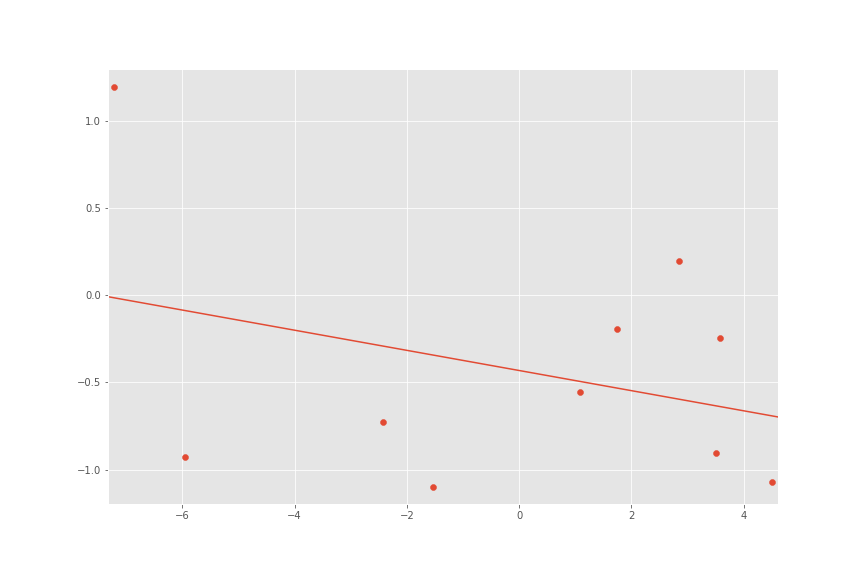

In [27]:
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
# descente de gradient

# descente de gradient sans stochasticite
param_trace , loss_trace = gd.optimize(learning_rate = 0.04, nb_iterations=50) 

####### Complete this part ######## or die ####################
# solution par pseudo inverse
X_inv = np.linalg.pinv(np.insert(X.reshape((X.shape[0], 1)), 0, 1, axis=1))
beta_pinv = np.dot(X_inv, y)
###############################################################

print('La loss pour la solution par pseudo-inverse est', l.val(beta_pinv))
print('La loss pour la solution obtenue par descente de gradient est', loss_trace[-1])

plot(X, y, beta_pinv)


**<span style='color:blue'> Remarques et question</span>** **On remarque ici que la valeur de la loss atteinte par GD est plus haute que celle atteinte par la solution de la pseudo-inverse. A votre avis pourquoi ? Augmentez le nombre d'itérations de GD. Que constatez vous ? Est-ce étonnant par rapport à votre brillante démonstration sur GD dans la section précédente ? Au passage, on pourrait s'amuser à montrer qu'avec l'initialisation $\beta=\boldsymbol{0}$, chaque step reste bien dans l'espace engendré par les vecteurs lignes de X. Qui veut passer au tableau ?**



 ----

### G. Avec sklearn

**<span style='color:blue'> Exercice</span>** 
**Proposez une régression linéaire sur le même problème en utilisant $\texttt{sklearn}$.**



 ----

La loss pour la solution obtenue par Sklearn est 0.40423212867457875


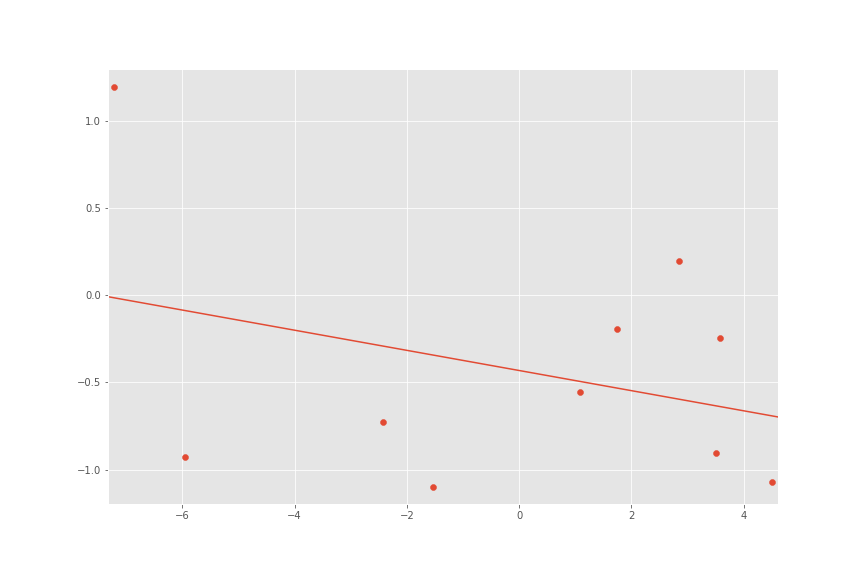

In [28]:
from sklearn.linear_model import LinearRegression

####### Complete this part ######## or die ####################
model = LinearRegression()
model.fit(X.reshape((X.shape[0], 1)), y)
###############################################################
coef = list(model.coef_)
coef.insert(0, model.intercept_)

print('La loss pour la solution obtenue par Sklearn est', l.val(coef))

plot(X, y, coef)


## IV. Features - Variables explicatives transformées

Dans beaucoup de problèmes réels, la variable à expliquer n'est pas une simple combinaison linéaire des variables explicatives. Cela peut-être une dépendence non linéaire (e.g. quadratique), ou des dépendences croisées entre nos variables explicatives. La stratégie permettant d'aborder cette problématique consiste à transformer notre vecteur $\boldsymbol{x}$ en rajoutant par exemple des transformations quadratiques et à optimiser notre modèle linéaire sur le vecteur transformé. Afin de simplifier les notations, nous allons volontairement omettre le biais $\beta_0$ de nos notations.

Construire nos *features* consiste à chercher une fonction $\phi:\mathbb{R}^d\mapsto\mathbb{R}^p$ qui transforme non-linéairement nos variables explicatives initiales.


Le problème se reformule ainsi de la manière suivante :


$$\hat{y}=\langle \phi(\boldsymbol{x}), \boldsymbol{\beta}\rangle$$


Il suffit donc de transformer nos variables explicatives par $\phi$ et de considérer le résultat comme nos nouvelles variables explicatives.

### A. Construction du jeu de données polynomial

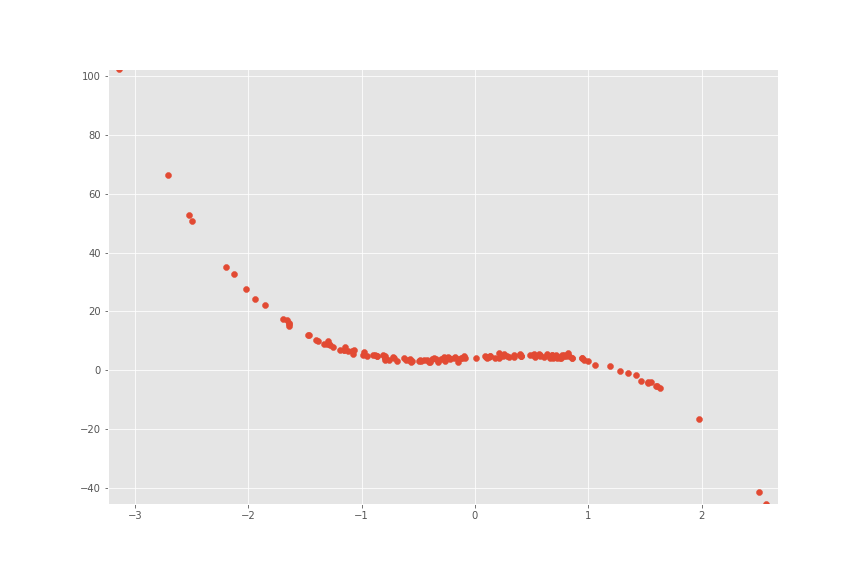

In [29]:
import numpy as np

# vrais parametres
beta_cube = np.random.uniform(-4, 4, size=(4,1))

def sample_data_cube(n, sigma=1):
    X = np.random.normal(0, sigma, size=n)
    noise = np.random.normal(1, 1, size=n)/2
    y = beta_cube[3] * X ** 3 + beta_cube[2] * X ** 2 + beta_cube[1] * X + beta_cube[0] + noise
    return X, y
X, y = sample_data_cube(6)
X_test, y_test = sample_data_cube(150)

#affichage du polynome
plot(X_test, y_test)

### B. Solution par pseudo-inverse

**<span style='color:blue'> Exercice</span>** **Complétez le code ci-dessous en utilisant une solution par pseudo-inverse via $\texttt{numpy}$.**


 ----

In [30]:
class Polynomial(object):
    def __init__(self, deg):
        self.deg = deg

    def _transform(self, X):
        # here we transform the input into a polynomial
        ####### Complete this part ######## or die ####################
        t = []
        X = X.reshape((X.shape[0], 1)) if len(X.shape) == 1 else X
        for i in range(0, self.deg+1):
            t.append(X**i)
        return np.concatenate(t, axis=1)
        ###############################################################
    
    def fit(self, X, y):
        ####### Complete this part ######## or die ####################
        X_transformed = self._transform(X)
        self.beta = np.dot(np.linalg.pinv(X_transformed), y)
        ###############################################################
        
    def predict(self, X):
        if self.beta is None:
            print('You must fit the model first')
        else:
            X_transformed = self._transform(X)
            return np.dot(X_transformed, self.beta)
    def score(self, X, y):
        prediction = self.predict(X)
        errors = (prediction - y) **2
        return errors.sum()/errors.shape[0]
    
# vraie solution
real_model = Polynomial(deg=3)
real_model.beta = beta_cube


**<span style='color:blue'> Exercice</span>** 
**Le plot est affiché avec un jeu dit de test. Il s'agit d'un ensemble de points qui n'ont pas été utilisés lors de notre apprentissage (par pseudo-inverse). Le jeu d'apprentissaget et de test n'ont souvent pas la même taille.**

**Jouez avec le degré du polynôme que vous manipulez et observez le résultat. Que constatez-vous ?**



 ----

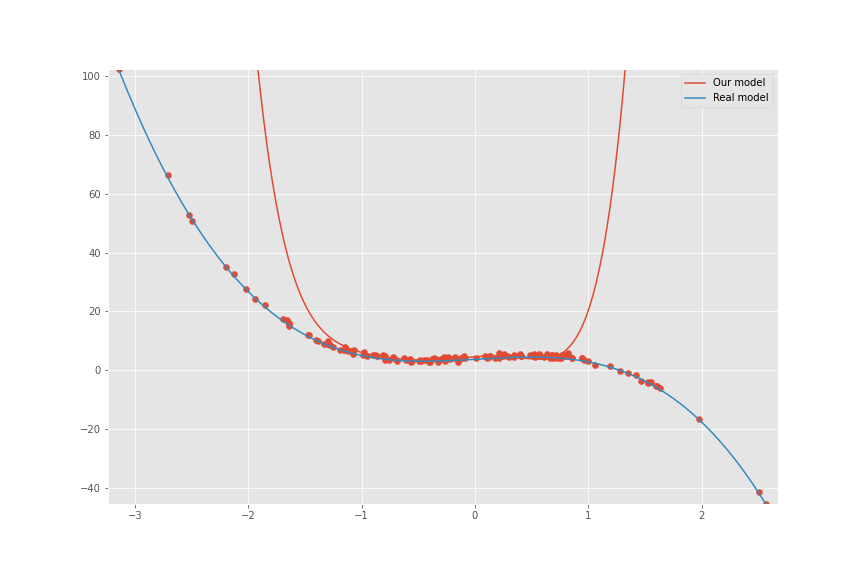

Empirical risk:  2.032631599119474e-28


In [31]:
deg = 6
model = Polynomial(deg)

model.fit(X, y)

plot(X_test, y_test, func=[(model.predict, 'Our model'), (real_model.predict, 'Real model')])

print('Empirical risk: ', model.score(X, y))


**<span style='color:blue'> Remarque et question</span>** 
**Le risque empirique est celui calculé directement sur les données utilisées lors du calcul du pseudo-inverse. Que constatez-vous par rapport à ce dernier lorsque vous jouez avec le degré du polynôme ?**

**Est-il un bon indicateur du véritable risque de généralisation ? Autrement dit, est-il un bon indicateur de la qualité du polynôme obtenu.**



 ----

### C. Solution Sklearn

**<span style='color:blue'> Exercice</span>** **Proposez la même solution polynomiale via $\texttt{sklearn}$. Choisissez le même degré qu'utilisé au-dessus et comparez les résultats.**


 ----

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

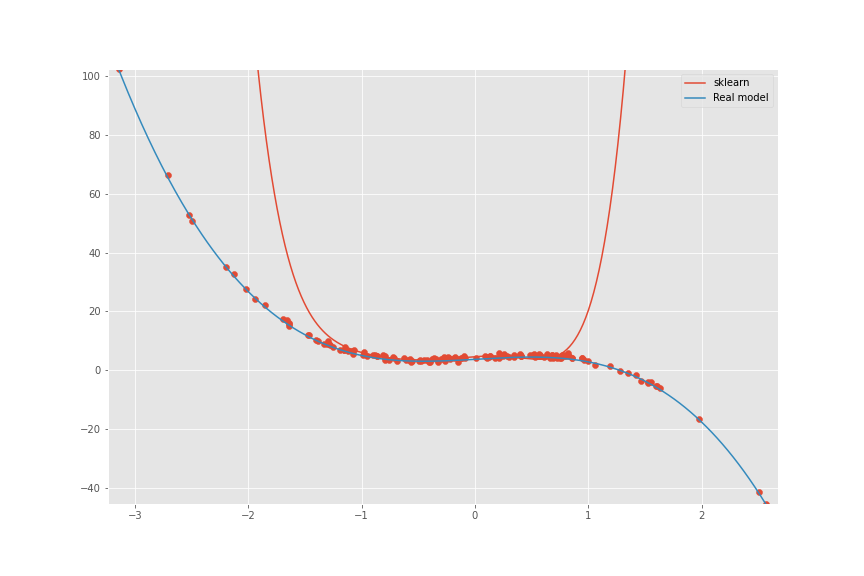

In [33]:
####### Complete this part ######## or die ####################
...
...
###############################################################

plot(X_test, y_test, func=[(model.predict, 'sklearn'), (real_model.predict, 'Real model')])


## V. La validation croisée et le dilemme biais-variance

Vous avez pu constater qu'en fonction du degré du polynôme choisi dans l'exercice précédent, le modèle obtenu était plus ou moins loin de la solution idéale. De plus, le risque empirique s'est montré être un piètre estimateur de la qualité de notre solution estimée.

En réalité, le risque empirique est un estimateur sans biais du risque de généralisation pour un vecteur de paramètres quelconque. Ce n'est plus vrai si on choisit la solution estimée via notre optimisation. Dit autrement&nbsp;:

$$R(\boldsymbol{\beta})=\mathbb{E}_{\mathcal{S}}\Big[J(\boldsymbol{\beta})\Big],\text{ }\boldsymbol{\beta}\text{ quelconque, et }R(\text{argmin}_{\boldsymbol{\beta}}J(\boldsymbol{\beta}))\neq \mathbb{E}_{\mathcal{S}}\Big[\text{argmin}_{\boldsymbol{\beta}}J(\boldsymbol{\beta})\Big]$$

---

Nous pouvons décomposer l'erreur attendue en briques élémentaires qui nous permettront d'en saisir l'origine. Reprenons l'erreur suivante&nbsp;:

$$R(\boldsymbol{\hat{\beta}})=\mathbb{E}\big[J(\boldsymbol{\hat{\beta}})\big]=\mathbb{E}\big[(y-\hat{f}(x))^2\big],$$

où $y=f(x)+\epsilon$, $\epsilon\sim \mathcal{N}(0, \sigma^2)$ avec $f$ la "vraie" fonction et $\hat{f}$ notre estimateur de celle-ci. Nous avons ainsi&nbsp;:

$$\begin{aligned}
\mathbb{E}\big[(y-\hat{f}(x))^2\big]&=\mathbb{E}\big[y^2\big]-2\mathbb{E}\big[y\hat{f}(x)\big]+\mathbb{E}\big[\hat{f}(x)^2\big].
\end{aligned}$$

Remarquons tout d'abord&nbsp;:

$$\mathbb{E}\big[\hat{f}(x)^2\big]=\text{Var}\big(\hat{f}(x)\big)+\mathbb{E}\big[\hat{f}(x)\big]^2,$$

ainsi que&nbsp;:

$$\mathbb{E}\big[y^2\big]=\text{Var}\big(y\big)+\mathbb{E}\big[y\big]^2,$$

où&nbsp;:

$$\mathbb{E}\big[y\big]=\mathbb{E}\big[f(x)+\epsilon\big]=\mathbb{E}\big[f(x)\big]=f(x),$$

et enfin&nbsp;:

$$\begin{aligned}
\mathbb{E}\big[y\hat{f}(x)\big]&=\mathbb{E}\big[(f(x)+\epsilon)\hat{f}(x)\big]\\
&=\mathbb{E}\big[f(x)\hat{f}(x)\big]+\mathbb{E}\big[\epsilon\hat{f}(x)\big]\\
&=f(x)\mathbb{E}\big[\hat{f}(x)\big]+\mathbb{E}\big[\epsilon\big]\mathbb{E}\big[\hat{f}(x)\big]\\
&=f(x)\mathbb{E}\big[\hat{f}(x)\big].
\end{aligned}$$

En regroupant tout ensemble, nous avons donc&nbsp;:

$$\begin{aligned}
\mathbb{E}\big[(y-\hat{f}(x))^2\big]&=\text{Var}\big(y\big)+f(x)^2-2f(x)\mathbb{E}\big[\hat{f}(x)\big]+\text{Var}\big(\hat{f}(x)\big)+\mathbb{E}\big[\hat{f}(x)\big]^2\\
&=\sigma^2+\text{Var}\big(\hat{f}(x)\big)+\mathbb{E}\big[f(x)-\hat{f}(x)\big]^2\\
&=\sigma^2+\text{Var}\big(\hat{f}\big)+\text{bias}(\hat{f})^2.\end{aligned}$$

On observe donc que l'erreur de notre modèle se décompose théoriquement en trois éléments&nbsp;:

* **Erreur irréductible :** $\sigma^2$. Quand bien même nous connaîtrions le véritable processus générateur de nos données, notre erreur quadratique serait toujours de $\sigma^2$,
* **Variance :** $\text{Var}\big(\hat{f}\big)$. Elle décrit la fluctuation de notre apprentissage autour de son espérance,
* **Biais (au carré) :** $\text{bias}(\hat{f})^2$. Il nous donne l'écart en espérance entre notre estimateur et le véritable processus générateur.

Toute la difficulté vient du fait qu'il est très facile de réduire le biais en augmentant la complexité de notre modèle entraînant par la même une augmentation de la variance...

---

Cela implique de mettre en place une procédure expérimentale permettant d'évaluer la qualité de notre modèle.

### A. Construction du jeu de données

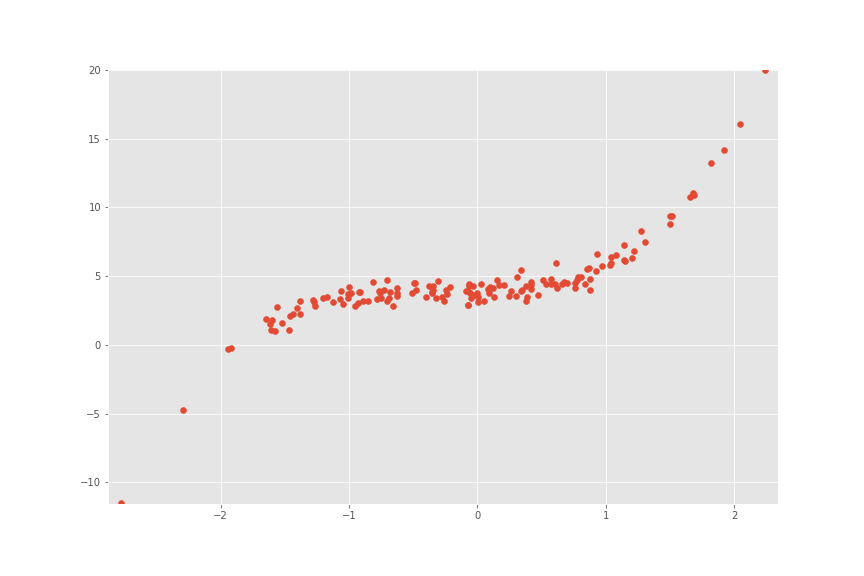

In [34]:
import numpy as np

beta_cube = np.random.uniform(-4, 4, size=(4,1))

def sample_data_cube(n, sigma=1):
    X = np.random.normal(0, sigma, size=n)
    noise = np.random.normal(1, 1, size=n)/2
    y = beta_cube[3] * X ** 3 + beta_cube[2] * X ** 2 + beta_cube[1] * X + beta_cube[0] + noise
    return X, y
X, y = sample_data_cube(50)
X_test, y_test = sample_data_cube(150)

X = X.reshape((X.shape[0], 1))
X_test = X_test.reshape((X_test.shape[0], 1))

plot(X_test, y_test)

### B. Optimiser une fonction est-il suffisant pour parler d'apprentissage ?

Il existe deux stratégies d'évaluation sans biais de la qualité de notre modèle :
* La validation non croisée où une partie de notre jeu de donnée est cachée pendant l'apprentissage puis utilisée afin d'évaluer les performances du modèle. Il s'agit du découpage train/test. Cette stratégie est un estimateur sans biais de la qualité de notre modèle mais possède une variance plus forte que la validation croisée. Elle peut-être particulièrement utile lorsque le coût d'apprentissage d'un modèle est très élevé (e.g. *deep learning*)
* La validation croisée où notre jeu de données est divisé en *k* parties (on parle aussi de *k-fold*). Évidemment, $k\in\{2, ..., n\}$ où $n$ est la taille du jeu de données. Chacune des parties jouera successivement le rôle de jeu de test pendant que les $k-1$ autres parties serviront à calculer notre modèle. Le résultat de cette procédure est un vecteur de $k$ scores dont on peut calculer la moyenne, la variance, etc.

On peut illustrer la méthode des *k-folds* via l'exemple suivant :

$$\begin{align}
\text{Appartient au train set: } \color{red}{\boxed{}}&\text{ et appartient au test set: }\color{green}{\boxed{}}
\end{align}$$

$$\begin{align}
\text{Step 1: }\color{green}{\boxed{}}\color{red}{\boxed{}}&\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}
\end{align}$$

$$\begin{align}
\text{Step 2: }\color{red}{\boxed{}}\color{green}{\boxed{}}&\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}
\end{align}$$

$$\begin{align}
\text{Step 3: }\color{red}{\boxed{}}\color{red}{\boxed{}}&\color{green}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}
\end{align}$$

$$\begin{align}
\text{Step 4: }\color{red}{\boxed{}}\color{red}{\boxed{}}&\color{red}{\boxed{}}\color{green}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}
\end{align}$$

$$\begin{align}
\text{Step 5: }\color{red}{\boxed{}}\color{red}{\boxed{}}&\color{red}{\boxed{}}\color{red}{\boxed{}}\color{green}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}
\end{align}$$

$$\begin{align}
\text{Step 6: }\color{red}{\boxed{}}\color{red}{\boxed{}}&\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{green}{\boxed{}}\color{red}{\boxed{}}
\end{align}$$

$$\begin{align}
\text{Step 7: }\color{red}{\boxed{}}\color{red}{\boxed{}}&\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{green}{\boxed{}}
\end{align}$$

La méthode $\texttt{cross_val_score}$ de $\texttt{sklearn}$ permet de réaliser cette procédure. On pourra renseigner le paramètre $\texttt{cv}$ qui indique le nombre $k$ et le paramètre $\texttt{scoring}$ qui donne la métrique que l'on souhaite calculer.

**<span style='color:blue'> Exercice</span>** **Proposez un *5-fold* avec la métrique $R^2$ que vous appliquerez à une régression polynomiale de degré $5$.**



 ----

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

####### Complete this part ######## or die ####################
...
...
###############################################################

print('Le score R2 sur chacun des splits de notre k-fold:', scores)


NameError: ignored

**<span style='color:blue'> Exercice</span>** **Comparez le score obtenu lors de votre validation croisée à un plot de la fonction estimée sur tout le jeu d'apprentissage.**



 ----

In [ ]:
####### Complete this part ######## or die ####################
...
###############################################################
plot(X_test, y_test, func=model.predict)


## VI. L'effet "double descente" (Bonus ?)

Comme vu précédemment, l'effet du bruit sur l'estimateur dépend du conditionnement de $X^TX$. Le conditionnement d'une matrice $A$ inversible est donné par :


$$C(A)=\lVert A^{-1}\rVert\lvert A\rVert$$


Il est évident que si $A\in{\mathbb{R}^{1\times 1}}^\star$, alors $C(A)=1$. Ce n'est absolument pas vrai dans le cas général.

L'exemple ci-dessous illustre cela via la norme de Frobenius (norme Euclidienne appliquée à une matrice, $\text{Tr}(A^TA)^{0.5}$). On préfèrera souvent la norme d'opérateur qui quantifie les effets d'amplification d'un vecteur $\boldsymbol{x}$ lorsqu'on calcule $A\boldsymbol{x}$. Cette norme d'opérateur est directement liée aux valeurs propres. Cependant, la norme de Frobenius est plus simple à calculer.

In [ ]:
A = np.diag([1, 0.0001])
print('A=\n', A)
print('C(A)=A^{-1}A=' + str(np.linalg.norm(np.linalg.inv(A))*np.linalg.norm(A)))

On remarque dans l'exemple que la matrice $A$ possède une toute petite valeur propre qui est responsable de cet écart. L'exercice ci-dessous montre qu'au-delà des considérations théoriques, cela a des répercussions importantes et totalement inattendues en réalité.

Les simulations suivantes permettent de mettre en lumière cela. Elles sont construites comme décrit ci-dessous :


$$\beta\sim\mathbb{U}(-2, 2)^d,\ d\in\mathbb{N}^\star$$


dit autrement, on fixe un vecteur de paramètres selon une loi uniforme qui dépend de la dimension du problème.
Nous avons ensuite :


$$x\sim\mathcal{N}(\boldsymbol{0}, \boldsymbol{I_d}) + \epsilon,\ \epsilon\sim\mathcal{N}(0, \sigma^2)$$


On construit ensuite un jeu de test de taille $500$ et un jeu d'apprentissage de taille variable. L'objectif ici sera d'étudié l'effet de la taille du jeu d'apprentissage sur la qualité de notre modèle, qualité que l'on aura calculée sur le test. Pour chaque taille de jeu de données, l'expérience est répétée $50$ fois ($\texttt{redo}$) afin de lisser les courbes obtenues.

**<span style='color:blue'> Exercice</span>** 

**Exécutez une première fois le code puis jouez avec $\texttt{noise}$ (i.e. $\sigma$) afin de voir ce qui se passe selon la quantité de bruit. Essayez de décrire rigoureusement ce que vous observez.**



 ----

In [ ]:
import numpy as np

####### Play with the noise #########
noise = 1.
#####################################

d = 50
redo = 50

beta = np.random.uniform(-2, 2, size=(d, 1))

mu = [0 for _ in range(d)]
cov = np.diag([1 for _ in range(d)])

test_size = 500
X_test = np.random.multivariate_normal(mean=mu, cov=cov, size=test_size)
y_test = np.dot(X_test, beta) + np.random.normal(0, 1, size=(test_size, 1)) * noise

errors = []
train_errors = []
for m in range(1, 100):
    error = 0
    train_error = 0
    for j in range(redo):
        # dataset construction
        X = np.random.multivariate_normal(mean=mu, cov=cov, size=m)
        y = np.dot(X, beta) + np.random.normal(0, 1, size=(m, 1)) * noise
        
        # param estimation
        beta_pinv = np.dot(np.linalg.pinv(X), y)
        
        # risk estimation
        error += ((np.dot(X_test, beta_pinv)-y_test)**2).sum()/(test_size*redo)
        train_error += ((np.dot(X, beta_pinv)-y)**2).sum()/(m*redo)
    train_errors.append(train_error)
    errors.append(error)

In [ ]:
plt.figure()
plt.plot([i for i in range(1, len(errors)+1)], train_errors, label="Train error")
plt.axvline(x=d, color='k', linewidth=2.0, linestyle='--', label='Dimension')
plt.plot([i for i in range(1, len(errors)+1)], errors, label="Risk estimation")
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.plot([i for i in range(1, len(errors)+1)], errors, label="Risk estimation")
plt.axvline(x=d, color='k', linewidth=2.0, linestyle='--', label='Dimension')
plt.legend()
plt.yscale('log')
plt.show()
plt.figure()
plt.plot([i for i in range(1, len(train_errors)+1)], train_errors, label="Train error")
plt.axvline(x=d, color='k', linewidth=2.0, linestyle='--', label='Dimension')
plt.legend()
plt.show()

La ligne en pointillé sépare visuellement deux régimes différents. La transition d'un régime à l'autre se produit par une augmentation catastrophique de l'erreur de généralisation de notre modèle.

**<span style='color:blue'> Question</span>** 
**Quelle particularité différentie les deux phases ?**



 ----

En réalité, les méthodes de *machine learning* traditionnelles se situent plutôt dans le régime de "droite". L'étude de ce phénomène est poussée par les approches comme le *deep learning* qui sont souvent dans le régime de gauche. Comprendre ces phénomènes nous permet par exemple d'éclairer les raisons du succès du *deep learning*.

## VII. Régularisation

Comme illustré par les quelques scénarios précédents dont le cas catastrophique de la double descente, une certaine parcimonie est attendue par notre modèle. On a pu notamment observer que les "mauvaises" fonctions du point de vue du risque de généralisation avaient une forte tendance à osciller n'importe comment. Au lieu de laisser jouer le "hasard" (ou plutôt le conditionnement de $X^TX$), nous pouvons contraindre notre optimisation à favoriser les solutions parcimonieuses ; c'est-à-dire des solutions qui n'oscillent pas n'importe comment.

Intuitivement, on va choisir une solution qui minimise à la fois le risque empirique $J(\boldsymbol{\beta})$, mais aussi une pénalité sur la taille des "oscillations". En réalité, les oscillations sont directement contrôlées par la norme des paramètres : un grand poids rendra notre modèle très sensible à la moindre perturbation de la variable explicative associée.

Nous parlons d'optimisation régularisée lorsque la fonction à optimiser s'écrit de la manière suivante :


$$J(\boldsymbol{\beta})=\frac{1}{m}\sum_{i=1}^nr(f_{\boldsymbol{\beta}}(\boldsymbol{x_i}), y_i)+\lambda P(\boldsymbol{\beta})$$

où $r:\mathcal{Y}\times\mathcal{Y}\mapsto \mathbb{R}^+$ est notre risque élémentaire et $P:\mathbb{R}^d\mapsto\mathbb{R}^+$ une pénalité sur notre vecteur de paramètres. Plus précisément, dans le cas de la régression linéaire, nous avons :



 ----
La régression linéaire sans pénalité s'obtient avec $\texttt{LinearRegression}$. Celle avec pénalité $\ell_2$ s'obtient avec $\texttt{Ridge}$, avec pénalité $\ell_1$ est $\texttt{Lasso}$ et Elastic-Net $\texttt{ElasticNet}$.



 ----

$$r(\hat{y}, y)=(\hat{y}-y)^2$$


et


$$P(\boldsymbol{\beta})=\lVert \boldsymbol{\beta} \rVert,$$


où $\lVert \cdot \rVert$ est une norme quelconque. Les choix classiques sont la norme $\ell_1$ :


$$\lVert \boldsymbol{\beta} \rVert_1=\sum_j |\boldsymbol{\beta}_j|$$


et la norme $\ell_2$ :


$$\lVert \boldsymbol{\beta} \rVert_2 = \sqrt{\sum_j\boldsymbol{\beta}_j^2}=\sqrt{\boldsymbol{\beta}^T\boldsymbol{\beta}}$$


Une stratégie intermédiaire consiste à prendre la combinaison convexe des deux normes :


$$P(\boldsymbol{\beta})=\eta \lVert \boldsymbol{\beta} \rVert_1 + (1-\eta) \lVert \boldsymbol{\beta} \rVert_2.$$


avec $\eta\in\big[0,1\big]$. On parle alors d'*elastic-net*.

Ces différentes régularisations ne se comportent pas de la même manière. Ainsi la régularisation $\ell_1$, aussi appelée Lasso, va forcer certains paramètres à atteindre la valeur $0$. Cela permet par exemple de favoriser l'explicabilité de notre modèle. En pratique, $\ell_2$, appelée Ridge, a tendance à donner les meilleurs résultats d'un point de vue prédictif.

### A. Construction du jeu de données

In [ ]:
import numpy as np

beta_cube = np.random.uniform(-4, 4, size=(4,1))

def sample_data_cube(n, sigma=1):
    X = np.random.normal(0, sigma, size=n)
    noise = np.random.normal(1, 1, size=n)/2
    y = beta_cube[3] * X ** 3 + beta_cube[2] * X ** 2 + beta_cube[1] * X + beta_cube[0] + noise
    return X, y
X, y = sample_data_cube(20)
X_test, y_test = sample_data_cube(150)

X = X.reshape((X.shape[0], 1))
X_test = X_test.reshape((X_test.shape[0], 1))

plot(X_test, y_test)

### B. Sans régularisation

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
model = make_pipeline(PolynomialFeatures(10), LinearRegression())
model.fit(X, y)

plot(X_test, y_test, func=model.predict)

### C. Avec régularisation $\ell_1$

Lorsqu'on parle de régresion linéaire avec régularisation $\ell_1$, on parle aussi de Lasso.

**<span style='color:blue'> Exercice</span>** **Testez plusieurs valeurs de $\alpha$ ($=\lambda$ dans notre texte). Quelle est la fonction la plus parcimonieuse que vous arrivez à obtenir ?**


 ----

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model = make_pipeline(PolynomialFeatures(10), Lasso(alpha=15.))
model.fit(X, y)

plot(X_test, y_test, func=model.predict)

In [ ]:
print('Les paramètres du modèle sont sparses :\n', model[1].coef_)

Vous avez du constater que selon la quantité de régularisation, les paramètres étaient plus ou moins sparse. Il se trouve qu'une fois qu'un paramètre est à 0, il le sera pour toutes les valeurs de $\alpha$ suppérieures. Afin d'observer visuellement, l'effet de la régularisation sur la sparsité, il est possible d'afficher ce qu'on appelle les "chemins Lasso" ou Lasso paths.

In [ ]:
from sklearn.linear_model import lars_path
features = PolynomialFeatures(10)
X_transformed = features.fit_transform(X)
_, _, coefs = lars_path(X_transformed, y, method='lasso')

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
# plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

A gauche se trouve le paramètre le plus parcimonieux (la plus grande valeur de $\alpha$). Tous les paramètres y sont donc nuls. Plus la valeur de $\alpha$ est réduite, plus le nombre de paramètres différents de $0$ augmente et leur valeur aussi.

### D. Avec régularisation $\ell_2$

Lorsqu'on parle de régresion linéaire avec régularisation $\ell_2$, on parle aussi de Ridge.

**<span style='color:blue'> Exercice</span>** **Testez plusieurs valeurs de $\alpha$ ($=\lambda$ dans notre texte). Quelle est la fonction la plus parcimonieuse que vous arrivez à obtenir ?**



 ----

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = make_pipeline(PolynomialFeatures(10), Ridge(alpha=1000))
model.fit(X, y)

plot(X_test, y_test, func=model.predict)

### E. Avec régularisation *elastic-net*

Lorsqu'on parle de régresion linéaire avec régularisation *elastic-net*.

**<span style='color:blue'> Exercice</span>** 
**Testez plusieurs valeurs de $\alpha$ ($=\lambda$ dans notre texte). Quelle est la fonction la plus parcimonieuse que vous arrivez à obtenir (Essayez de trouver la réponse en raisonnant) ?**



 ----

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
model = make_pipeline(PolynomialFeatures(10), ElasticNet(alpha=20, l1_ratio=0.8))
model.fit(X, y)

plot(X_test, y_test, func=model.predict)

## VIII. Selection de modèles

En pratique, nous ne pouvons pas choisir la valeur des paramètres (e.g. degré, régularisation) à l'oeil comme précédemment. Il nous faut (1) un algorithme qui automatise cette tâche et (2) une stratégie d'évaluation rigoureuse afin d'éviter les biais de confirmation (sur-apprentissage).

### A. Construction du jeu de données

In [ ]:
import numpy as np

beta_cube = np.random.uniform(-4, 4, size=(4,1))

def sample_data_cube(n, sigma=1):
    X = np.random.normal(0, sigma, size=n)
    noise = np.random.normal(1, 1, size=n)/2
    y = beta_cube[3] * X ** 3 + beta_cube[2] * X ** 2 + beta_cube[1] * X + beta_cube[0] + noise
    return X, y
X, y = sample_data_cube(50)
X_test, y_test = sample_data_cube(150)

X = X.reshape((X.shape[0], 1))
X_test = X_test.reshape((X_test.shape[0], 1))

plot(X_test, y_test)

### B. Recherche exhaustive

L'algorithme de recherche par grille va exhaustivement testé tous les paramètres donnés. Pour chacun combinaison, une validation *k-fold* est réalisée. Le modèle retenu sera celui qui aura maximisé son score moyen lors du *k-fold*.

**<span style='color:blue'> Exercice</span>** 
**Utilisez l'objet $\texttt{GridSearchCV}$ afin de trouver la meilleure combinaison de paramètres selon le dictionnaire décrit ci-dessous. Toutes les combinaisons seront-elles réellement testées ?**



 ----

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, Ridge, LinearRegression, Lasso

In [ ]:
param_grid = [
  {'model': [LinearRegression()], 
   'poly__degree': [1, 2, 3, 4, 5]},
  {'model': [Ridge()], 
   'poly__degree': [1, 2, 3, 4, 5], 
   'model__alpha': [0., 0.1, 0.2, 0.5, 0.8, 10., 100., 100.]},
  {'model': [Lasso()], 
   'poly__degree': [1, 2, 3, 4, 5],
   'model__alpha': [0., 0.1, 0.2, 0.5, 0.8]},
  {'model': [ElasticNet()], 'poly__degree': [1, 2, 3, 4, 5],
  'model__alpha': [0., 0.1, 0.2, 0.5, 0.8, 10., 100., 100.],
  'model__l1_ratio': [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.9, 1.]},
 ]

In [ ]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(10)), ('model', LinearRegression())])
####### Complete this part ######## or die ####################
...
...
###############################################################

print('Le meilleur modele est', search.best_estimator_)
plot(X_test, y_test, func=search.best_estimator_.predict)


### C. Recherche aléatoire

Une recherche exhaustive peut rapidement être limitante. Imaginons que nous testions déjà $10000$ combinaisons de paramètres. Rajoutons maintenant un paramètre avec 50 modalités. Le nombre de combinaisons est donc multiplié par $50$ et on monte à $500000$ combinaisons. L'algorithme devient $50$ fois plus lent. 

Une stratégie alternative est de s'appuyer sur le hasard. On peut spécifier a priori des distributions sur les paramètres en supposant que certaines combinaisons fourniront probablement plus de bons résultats que d'autres. Par défaut, le tirage est uniforme. Cette méthode n'est pas absurde car plusieurs combinaisons peuvent très bien obtenir des résultats très proches. L'approche aléatoire sera ainsi beaucoup plus efficaces que la recherche exhaustive pour des performances généralement assez proches.

**<span style='color:blue'> Exercice</span>** 
**Complétez le code ci-dessous afin de réaliser une recherche randomisée. Quel paramètre permet de jouer sur le nombre de tirages ?**



 ----

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = [
  {'model': [LinearRegression()], 
   'poly__degree': [d for d in range(1, 20)]},
  {'model': [Ridge()], 
   'poly__degree': [d for d in range(1, 20)], 
   'model__alpha': [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1., 10., 100., 100.]},
  {'model': [Lasso()], 
   'poly__degree': [d for d in range(1, 20)],
   'model__alpha': [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]},
  {'model': [ElasticNet()], 'poly__degree': [d for d in range(1, 20)],
  'model__alpha': [0.1, 0.2, 0.5, 0.8, 10., 100., 100.],
  'model__l1_ratio': [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.9, 1.]},
]

In [ ]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(10)), ('model', LinearRegression())])

search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X, y)

In [ ]:
print('Le meilleur modele est', search.best_estimator_)
plot(X_test, y_test, func=search.best_estimator_.predict)

In [ ]:
####### Complete this part ######## or die ####################
...
...
###############################################################

print('Le meilleur modele est', search.best_estimator_)
plot(X_test, y_test, func=search.best_estimator_.predict)


In [ ]:
print('Le meilleur modele est', search.best_estimator_)
plot(X_test, y_test, func=search.best_estimator_.predict)

## IX. Le mot de la fin

Ce propos introductif nous a permis de toucher du doigt la notion de sur-apprentissage. Quand est-ce que le meilleur modèle sur notre jeu d'apprentissage est suffisament bon en général ? Quand peut-on considérer qu'un modèle est suffisamment bon ? Aurions-nous pu trouver un meilleur modèle avec une procédure d'apprentissage différente ? 